
# 📈 Fonctions d'activation et analyse de leurs dérivées

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import math
from math import erfc, sqrt, exp
from math import pi as PI
from math import e as E
import sys

#sys.path.append('..')
#import fidle.pwk as pwk

#datasets_dir = pwk.init('ACTF1')

In [ ]:
pw=5 # taille des figures en pouce = argeur de l'image
ph=5 # hauteur de l'image

z = np.linspace(-5, 5, 200) # ensemble de 200 pts entre -5 et 5 (équivaut à x réel)  pour calculer y ensuite

def heaviside(z):
    return np.where(z<0,0,1)

def sign(z):
    return np.where(z<0,-1,1)
#    return np.sign(z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

def leaky_relu(z,a=0.05):
    return np.maximum(a*z, z)

def elu(z,a=1):
    #y=z.copy()
    y=a*(np.exp(z)-1)
    y[z>0]=z[z>0]
    return y

def selu(z):
    return SELU_L*elu(z,a=SELU_A)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

def softmax(z):
    exp_z = np.exp(z - np.max(z))  # astuce : soustraction pour éviter overflow
    return exp_z / np.sum(exp_z, axis=0)



---

## 🔹 Heaviside (échelon)

- **Formule** : $$ f(x) = \begin{cases} 1 & \text{si } x \geq 0 \\ 0 & \text{sinon} \end{cases} $$
- **Utilité** : Active ou non un neurone en fonction d'un seuil (perceptron historique).
- **Limite** : Fonction **non dérivable** en 0, dérivée nulle ailleurs ⇒ impossible d'utiliser du gradient pour l'apprentissage (pas d'optimisation possible par descente de gradient).
- **Observation** :  
  - Dérivée quasi-nulle partout.
  - Discontinuité brutale à $x=0$.




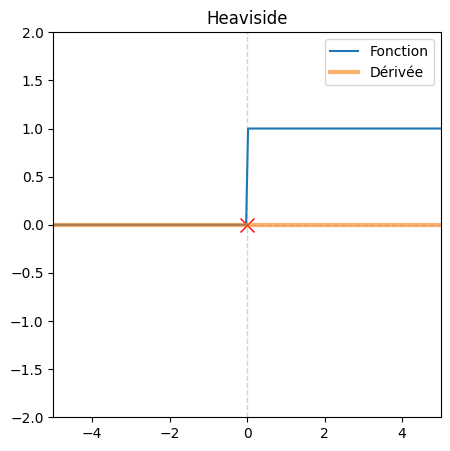

In [3]:
# ------ Heaviside
#
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw,ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linewidth=1, linestyle='--', color='lightgray')
ax.axvline(x=0, linewidth=1, linestyle='--', color='lightgray')
ax.plot(0, 0, "rx", markersize=10)

# --- On capture les lignes ---
line1, = ax.plot(z, heaviside(z), linestyle='-', label="Fonction")
line2, = ax.plot(z, derivative(heaviside, z), linewidth=3, alpha=0.6, label="Dérivée")

ax.set_title("Heaviside")

# --- et ici, on passe les bonnes lignes dans legend() ---
ax.legend(handles=[line1, line2], loc="best")

plt.show()


---

## 🔹 Sigmoid (Logistique)

- **Formule** : $$y = \frac{1}{1+e^{-x}}$$
- **Utilité** : Fonction lisse bornée entre 0 et 1, utilisée dans les réseaux neuronaux précoces et pour la classification binaire (sortie probabiliste).
- **Limite** :
  - **Saturation** pour $x\ll0$ ou $x\gg0$ (dérivée proche de 0 ⇒ "vanishing gradients").
  - Apprentissage très lent pour des entrées très grandes ou très petites.
- **Observation** :
  - La dérivée est maximale autour de $x=0$.
  - La pente devient presque nulle aux extrémités.



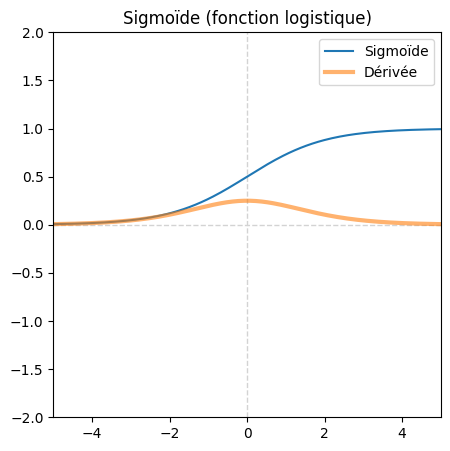

In [4]:
# ----- Sigmoïde
#
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw,ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linewidth=1, linestyle='--', color='lightgray')
ax.axvline(x=0, linewidth=1, linestyle='--', color='lightgray')

# --- On capture les lignes tracées ---
line1, = ax.plot(z, sigmoid(z),             linestyle='-', label="Sigmoïde")
line2, = ax.plot(z, derivative(sigmoid, z), linewidth=3, alpha=0.6, label="Dérivée")

ax.set_title("Sigmoïde (fonction logistique)")

# --- et ici, bonne légende avec les bonnes couleurs/styles ---
ax.legend(handles=[line1, line2], loc="best")

# pwk.save_fig('Sigmoïde')
plt.show()




---

## 🔹 Tanh

- **Formule** : $$y = \tanh(x)$$
- **Utilité** : Fonction bornée entre -1 et 1, meilleure centrage autour de 0 que la sigmoid (accélère l'apprentissage).
- **Limite** :
  - Toujours un problème de saturation aux extrêmes (gradients faibles).
- **Observation** :
  - Dérivée élevée autour de 0.
  - Dérivée tend vers 0 quand $x\to\pm\infty$.



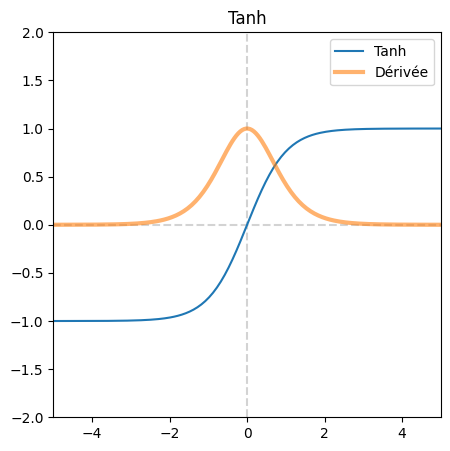

In [5]:
# ------ Tanh ------
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw, ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linestyle='--', color='lightgray')
ax.axvline(x=0, linestyle='--', color='lightgray')

line1, = ax.plot(z, tanh(z), linestyle='-', label="Tanh")
line2, = ax.plot(z, derivative(tanh, z), linewidth=3, alpha=0.6, label="Dérivée")
ax.set_title("Tanh")
ax.legend(handles=[line1, line2], loc="best")
plt.show()

---

## 🔹 ReLU (Rectified Linear Unit)

- **Formule** : $$y = \max(0,x)$$
- **Utilité** : Fonction très simple, très efficace pour les réseaux profonds : rapide à calculer et réduit fortement le problème du gradient qui disparaît.
- **Limite** :
  - **Morts de neurones** : si $x<0$, la dérivée est nulle, donc certains neurones peuvent ne plus jamais se réactiver.
- **Observation** :
  - Dérivée 0 pour $x<0$, 1 pour $x>0$.



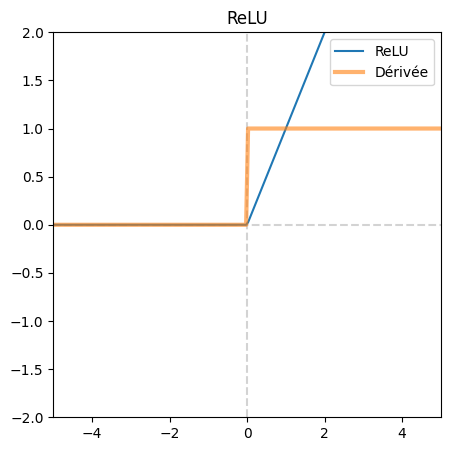

In [6]:
# ------ ReLU ------
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw, ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linestyle='--', color='lightgray')
ax.axvline(x=0, linestyle='--', color='lightgray')

line1, = ax.plot(z, relu(z), linestyle='-', label="ReLU")
line2, = ax.plot(z, derivative(relu, z), linewidth=3, alpha=0.6, label="Dérivée")
ax.set_title("ReLU")
ax.legend(handles=[line1, line2], loc="best")
plt.show()



---

## 🔹 Leaky ReLU

- **Formule** : $$y = \max(\alpha x, x)$$ avec $\alpha$ petit (ex: 0.05)
- **Utilité** : Variante de ReLU pour éviter les neurones morts en donnant une petite pente à $x<0$.
- **Limite** :
  - Choix de $\alpha$ arbitraire.
- **Observation** :
  - Dérivée légèrement positive pour $x<0$, 1 pour $x>0$.



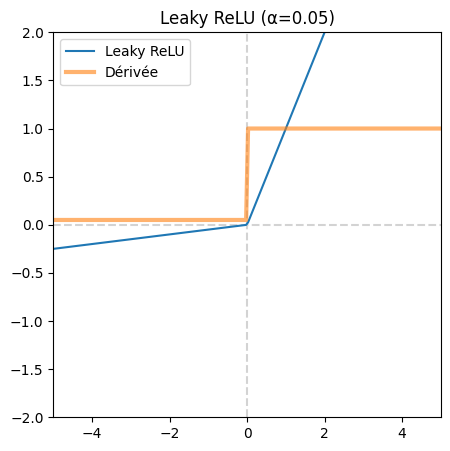

In [7]:
# ------ Leaky ReLU ------
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw, ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linestyle='--', color='lightgray')
ax.axvline(x=0, linestyle='--', color='lightgray')

line1, = ax.plot(z, leaky_relu(z), linestyle='-', label="Leaky ReLU")
line2, = ax.plot(z, derivative(leaky_relu, z), linewidth=3, alpha=0.6, label="Dérivée")
ax.set_title("Leaky ReLU (α=0.05)")
ax.legend(handles=[line1, line2], loc="best")
plt.show()

---

## 🔹 ELU (Exponential Linear Unit)

- **Formule** : 
  $$y = 
  \begin{cases}
  x & \text{si } x > 0\\
  \alpha(\exp(x)-1) & \text{si } x \leq 0
  \end{cases}
  $$
- **Utilité** : Rend la sortie négative pour $x<0$, ce qui aide à mieux centrer les activations autour de 0 et améliore l'apprentissage.
- **Limite** :
  - Plus coûteuse à calculer que ReLU.
- **Observation** :
  - Transition lisse entre négatif et positif.
  - Dérivée continue mais non constante.



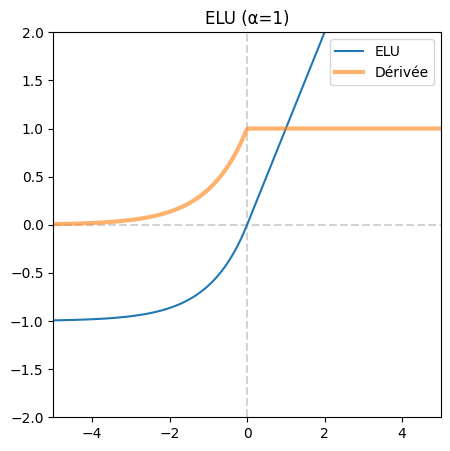

In [8]:
# ------ ELU ------
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw, ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linestyle='--', color='lightgray')
ax.axvline(x=0, linestyle='--', color='lightgray')

line1, = ax.plot(z, elu(z), linestyle='-', label="ELU")
line2, = ax.plot(z, derivative(elu, z), linewidth=3, alpha=0.6, label="Dérivée")
ax.set_title("ELU (α=1)")
ax.legend(handles=[line1, line2], loc="best")
plt.show()



---

## 🔹 SELU (Scaled Exponential Linear Unit)

- **Formule** : 
$$
\text{SELU}(x) = \lambda \times
\begin{cases}
x & \text{si } x > 0 \\
\alpha \left( e^x - 1 \right) & \text{si } x \leq 0
\end{cases}
$$
avec :
$\lambda \approx 1.05070, \quad \alpha \approx 1.67326$

- **Utilité** :  
SELU permet de maintenir automatiquement la moyenne et la variance des activations autour de valeurs fixes, ce qui stabilise et accélère l'entraînement des réseaux neuronaux profonds.   
Fonction utilisée dans les **réseaux auto-normalisants** (Self-Normalizing Neural Networks).

- **Limite** :  
Nécessite une initialisation spéciale (LeCun normal) et des architectures sans Batch Normalization.

- **Observation** :
  - Similaire à ELU mais avec un facteur d'échelle pour maintenir automatiquement la variance des activations.



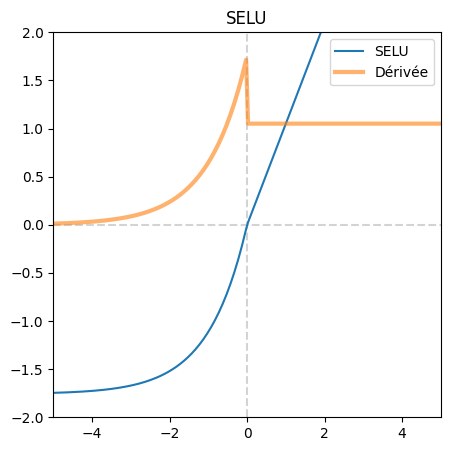

In [9]:
# ------ SELU ------
SELU_A = -sqrt(2/PI)/(erfc(1/sqrt(2))*exp(1/2)-1) # constante alpha de SELU
SELU_L = (1-erfc(1/sqrt(2))*sqrt(E))*sqrt(2*PI) / (2*erfc(sqrt(2))*E*E+PI*erfc(1/sqrt(2))**2*E-2*(2+PI)*erfc(1/sqrt(2))*sqrt(E)+PI+2)**0.5  # constante lambda de SELU

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw, ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linestyle='--', color='lightgray')
ax.axvline(x=0, linestyle='--', color='lightgray')

line1, = ax.plot(z, selu(z), linestyle='-', label="SELU")
line2, = ax.plot(z, derivative(selu, z), linewidth=3, alpha=0.6, label="Dérivée")
ax.set_title("SELU")
ax.legend(handles=[line1, line2], loc="best")
plt.show()

---
## 🔹 Softmax

- **Formule** : 
$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{k=1}^n e^{z_k}}
\quad \text{pour } i=1,\dots,n
$$
- **Utilité** : Transforme un vecteur de scores $(z_1, z_2, \dots, z_n)$ en **probabilités** positives qui **s'additionnent à 1**.  
Utilisée en **sortie de réseau** pour des problèmes de **classification multiclasse**.
- **Limite** :
  - Très **sensible aux grandes valeurs** : peut entraîner des instabilités numériques (overflow) ➔ souvent on retranche le max avant exponentiation pour stabiliser.
- **Observation** :
  - Amplifie les différences entre les scores.
  - Un score plus élevé obtient une probabilité beaucoup plus grande.

**Note importante** :  
Softmax **n'agit pas sur des scalaires** mais sur **des vecteurs entiers** : elle normalise tout un vecteur.

---

# 🔥 Résumé visuel
- La fonction Softmax n'est pas définie "par point", mais transforme **tout un vecteur** de scores en un vecteur de **probabilités normalisées**.
- Il est donc plus pertinent de représenter **plusieurs courbes en parallèle** pour voir comment les probabilités varient en fonction des scores.


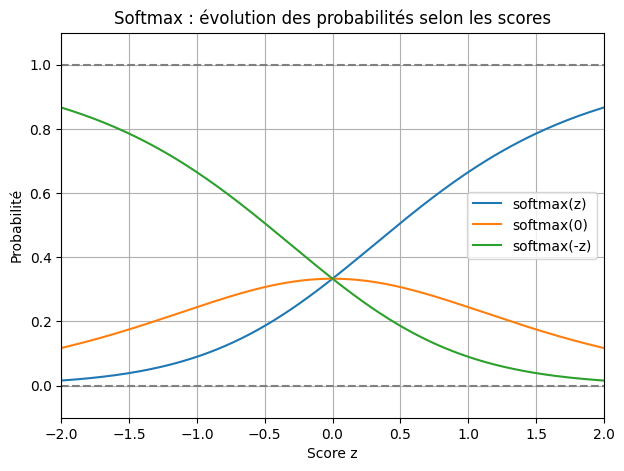

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(z):
    exp_z = np.exp(z - np.max(z))  # astuce : soustraction pour éviter overflow
    return exp_z / np.sum(exp_z, axis=0)

# Espace de scores
z = np.linspace(-2, 2, 200)

# On considère 3 scores : z1 = z, z2 = 0, z3 = -z
z1 = z
z2 = np.zeros_like(z)
z3 = -z

# Calcul de la softmax
S = np.vstack([z1, z2, z3])
softmax_outputs = softmax(S)

# Visualisation
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7,5)
ax.plot(z, softmax_outputs[0], label="softmax(z)")
ax.plot(z, softmax_outputs[1], label="softmax(0)")
ax.plot(z, softmax_outputs[2], label="softmax(-z)")
ax.axhline(1, linestyle='--', color='gray')
ax.axhline(0, linestyle='--', color='gray')
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(-2, 2)
ax.set_xlabel('Score z')
ax.set_ylabel('Probabilité')
ax.set_title('Softmax : évolution des probabilités selon les scores')
ax.legend()
plt.grid(True)
plt.show()


---
## 📚 Résumé : Fonction d'activation classique vs Softmax

| Fonction | Entrée | Sortie | Agit sur | Exemple |
|:---------|:-------|:-------|:---------|:--------|
| **Sigmoïde**, **Tanh**, **ReLU**, etc. | $f_j$ (scalaire) | $y_j$ (scalaire) | **Point par point** (indépendamment pour chaque neurone) | $y_j = \tanh(f_j)$ |
| **Softmax** | $(f_1, f_2, \dots, f_n)$ (vecteur) | $(p_1, p_2, \dots, p_n)$ (vecteur) | **Sur tout le vecteur** (normalisation collective) | $p_i = \frac{e^{f_i}}{\sum_{k=1}^n e^{f_k}}$ |

---

✅ **Fonctions comme Sigmoïde, Tanh, ReLU** :
- Elles transforment **individuellement** chaque score $f_j$ en une sortie $y_j$.

✅ **Softmax** :
- Elle considère **tout un vecteur de scores à la fois** et le transforme en un **vecteur de probabilités** dont la somme est **1**.




---
---
## 📚 Comparaison Sigmoïde vs Softmax

- **Sigmoïde** :
  - Applique la transformation $\sigma(x) = \frac{1}{1+e^{-x}}$ **indépendamment** à chaque score.
  - Chaque sortie est comprise entre 0 et 1, mais **la somme des sorties n'est pas nécessairement égale à 1**.
  - Approprié pour des **problèmes de classification binaire** (0 ou 1 par neurone).

- **Softmax** :
  - Transforme **tout un vecteur de scores en un vecteur de probabilités**.
  - La somme des probabilités est **toujours égale à 1**.
  - Approprié pour des **problèmes de classification multiclasse** (une seule classe prédite parmi plusieurs).

---

✅ **Sigmoïde** ➔ "Chaque neurone décide seul".  
✅ **Softmax** ➔ "Les neurones se concertent" pour donner une **répartition collective**.

---

### 🔥 Points clés visuellement :
- Après Sigmoïde : somme des sorties > 1 ou < 1 possible.
- Après Softmax : somme des sorties = 1 **toujours** (distribution de probabilité).


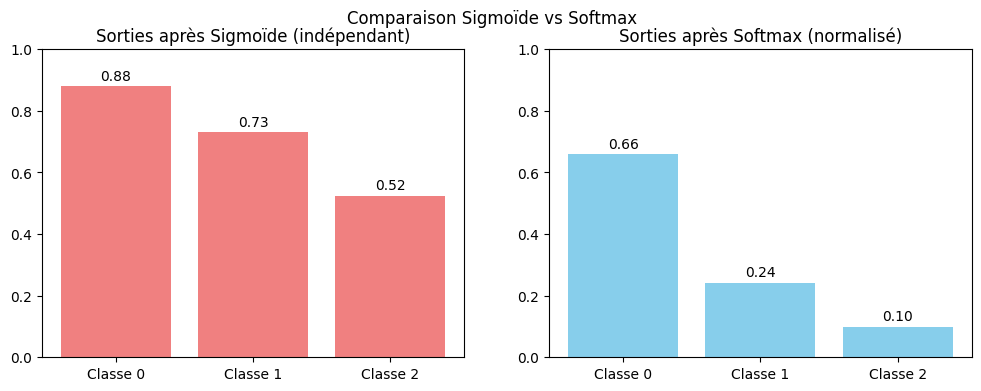

Scores initiaux : [2.  1.  0.1]
Sigmoïde : [0.88079708 0.73105858 0.52497919]
Softmax : [0.65900114 0.24243297 0.09856589]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des fonctions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(z):
    exp_z = np.exp(z - np.max(z))  # éviter les overflow numériques
    return exp_z / np.sum(exp_z)

# Exemple de scores bruts simulés
scores = np.array([2.0, 1.0, 0.1])

# Calcul des activations
sigmoid_outputs = sigmoid(scores)
softmax_outputs = softmax(scores)

# Affichage comparatif
classes = ['Classe 0', 'Classe 1', 'Classe 2']

fig, ax = plt.subplots(1, 2, figsize=(12,4))

# Graphe Sigmoïde
ax[0].bar(classes, sigmoid_outputs, color='lightcoral')
ax[0].set_ylim(0, 1)
ax[0].set_title("Sorties après Sigmoïde (indépendant)")
for i, p in enumerate(sigmoid_outputs):
    ax[0].text(i, p + 0.02, f"{p:.2f}", ha='center')

# Graphe Softmax
ax[1].bar(classes, softmax_outputs, color='skyblue')
ax[1].set_ylim(0, 1)
ax[1].set_title("Sorties après Softmax (normalisé)")
for i, p in enumerate(softmax_outputs):
    ax[1].text(i, p + 0.02, f"{p:.2f}", ha='center')

plt.suptitle("Comparaison Sigmoïde vs Softmax")
plt.show()

# Impression brute pour analyse
print("Scores initiaux :", scores)
print("Sigmoïde :", sigmoid_outputs)
print("Softmax :", softmax_outputs)


---
---
## 📽 Visualisation dynamique de Softmax

- Lorsque l'un des scores devient beaucoup plus grand que les autres,
  la fonction Softmax concentre quasiment toute la probabilité sur cette classe.
  
- C'est ainsi que Softmax permet de sélectionner **la classe dominante** dans un problème de classification multiclasse.

✅ Un score plus élevé ➔ Probabilité plus élevée ➔ Décision plus sûre.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Définir Softmax
def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / np.sum(exp_z)

# Préparation des classes
classes = ['Classe 0', 'Classe 1', 'Classe 2']

fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
bars = ax.bar(classes, [0,0,0], color='skyblue')
ax.set_ylim(0, 1)
ax.set_ylabel('Probabilité')
ax.set_title('Softmax : évolution avec un score dominant')

def update(frame):
    scores = np.array([frame, 1.0, 0.5])
    probs = softmax(scores)
    
    for bar, p in zip(bars, probs):
        bar.set_height(p)
    
    ax.set_title(f'Softmax avec score Classe 0 = {frame:.1f}')

# Création de l'animation
ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 10, 50), interval=200, repeat=True)

# --- NOUVEAU : Sauvegarder l'animation ---
ani.save('softmax_evolution.gif', writer='pillow', fps=5)






<IPython.core.display.Javascript object>